<a href="https://colab.research.google.com/github/ialkamal/gender-gap-mobile-access/blob/master/Gender_Digital_Gap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digital Gap by Gender
Dataset src: https://data.world/makeovermonday/2020w44

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [48]:
df = pd.read_excel("/content/drive/MyDrive/Coding Dojo/Fundamentals_Data_Science/viz5_november_digital_divide_final_dataset.xlsx")
df.head()

,Country,Internet users; % of households,Gender gap in internet access; % difference,Gender gap in mobile phone access; % difference
0,Algeria,0.744,0.217,0.073
1,Argentina,0.759,-0.057,-0.036
2,Australia,0.861,0.021,0.022
3,Austria,0.888,0.022,-0.010
4,Azerbaijan,0.782,0.150,0.115


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Country                                          100 non-null    object 
 1   Internet users; % of households                  100 non-null    float64
 2   Gender gap in internet access; % difference      100 non-null    float64
 3   Gender gap in mobile phone access; % difference  100 non-null    float64
dtypes: float64(3), object(1)
memory usage: 3.2+ KB


In [50]:
df.describe()

,Internet users; % of households,Gender gap in internet access; % difference,Gender gap in mobile phone access; % difference
count,100.000000,100.00000,100.000000
mean,0.576660,0.12899,0.063010
std,0.319139,0.16390,0.097725
min,0.003000,-0.14000,-0.039000
25%,0.244000,0.01850,0.000000
50%,0.713500,0.08150,0.032500
75%,0.865500,0.21700,0.108000
max,1.000000,0.70600,0.682000


Percentage of internet users of households (by country)

In [51]:
iu = df.loc[:,['Country','Internet users; % of households']]
iu.head()

,Country,Internet users; % of households
0,Algeria,0.744
1,Argentina,0.759
2,Australia,0.861
3,Austria,0.888
4,Azerbaijan,0.782


In [52]:
iu['Internet users; % of households'] = np.multiply(iu['Internet users; % of households'],100)
iu.head()

,Country,Internet users; % of households
0,Algeria,74.4
1,Argentina,75.9
2,Australia,86.1
3,Austria,88.8
4,Azerbaijan,78.2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


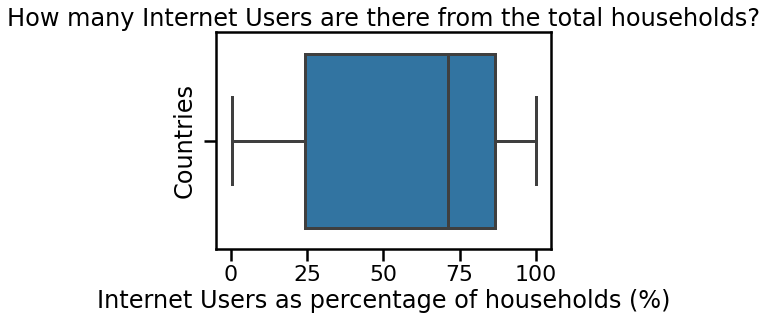

In [96]:
sns.boxplot(iu['Internet users; % of households'])
plt.title('How many Internet Users are there from the total households?')
plt.xlabel('Internet Users as percentage of households (%)')
plt.ylabel('Countries')
plt.show()

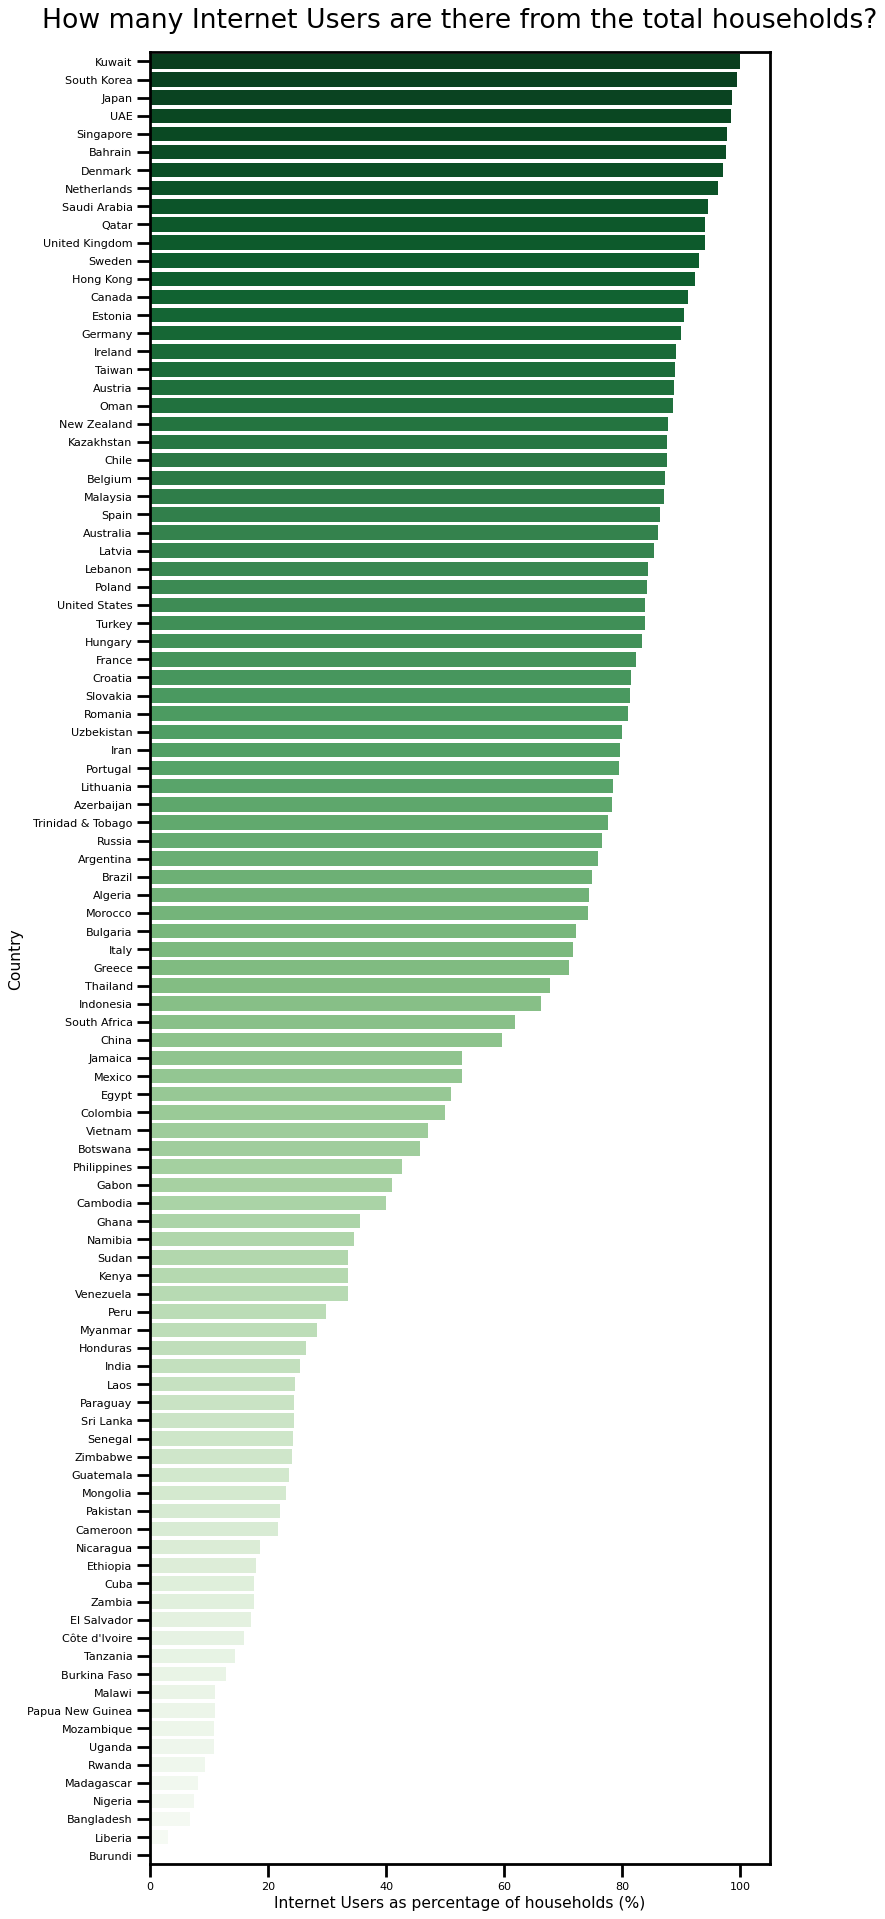

In [101]:
iu = iu.sort_values(by=['Internet users; % of households'],ascending = False)
plt.figure(figsize=(10,30), dpi=80)
palette = sns.color_palette("Greens",n_colors=len(iu['Country']))
palette.reverse()
sns.barplot(x = 'Internet users; % of households', y='Country',data=iu, palette = palette)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.title('How many Internet Users are there from the total households?',y=1.01)
plt.xlabel('Internet Users as percentage of households (%)', size=14)
plt.ylabel('Country',size=14)
plt.show()

## Gender Gap in Mobile Phone access

In [97]:
ma = df.loc[:,['Country','Gender gap in mobile phone access; % difference']]
ma['Gender gap in mobile phone access; % difference'] = np.multiply(ma['Gender gap in mobile phone access; % difference'],100)
ma.head()

,Country,Gender gap in mobile phone access; % difference
0,Algeria,7.3
1,Argentina,-3.6
2,Australia,2.2
3,Austria,-1.0
4,Azerbaijan,11.5


In [104]:
ma = ma.sort_values(by=['Gender gap in mobile phone access; % difference'],ascending = False)
ma.head()

,Country,Gender gap in mobile phone access; % difference
65,Pakistan,68.2
26,Ethiopia,29.9
12,Burundi,26.8
95,Uzbekistan,25.6
51,Madagascar,22.5


src: 
- https://matplotlib.org/2.1.0/tutorials/intermediate/legend_guide.html#sphx-glr-tutorials-intermediate-legend-guide-py
- https://docs.w3cub.com/matplotlib~3.1/_as_gen/matplotlib.axes.axes.tick_params#matplotlib.axes.Axes.tick_params

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


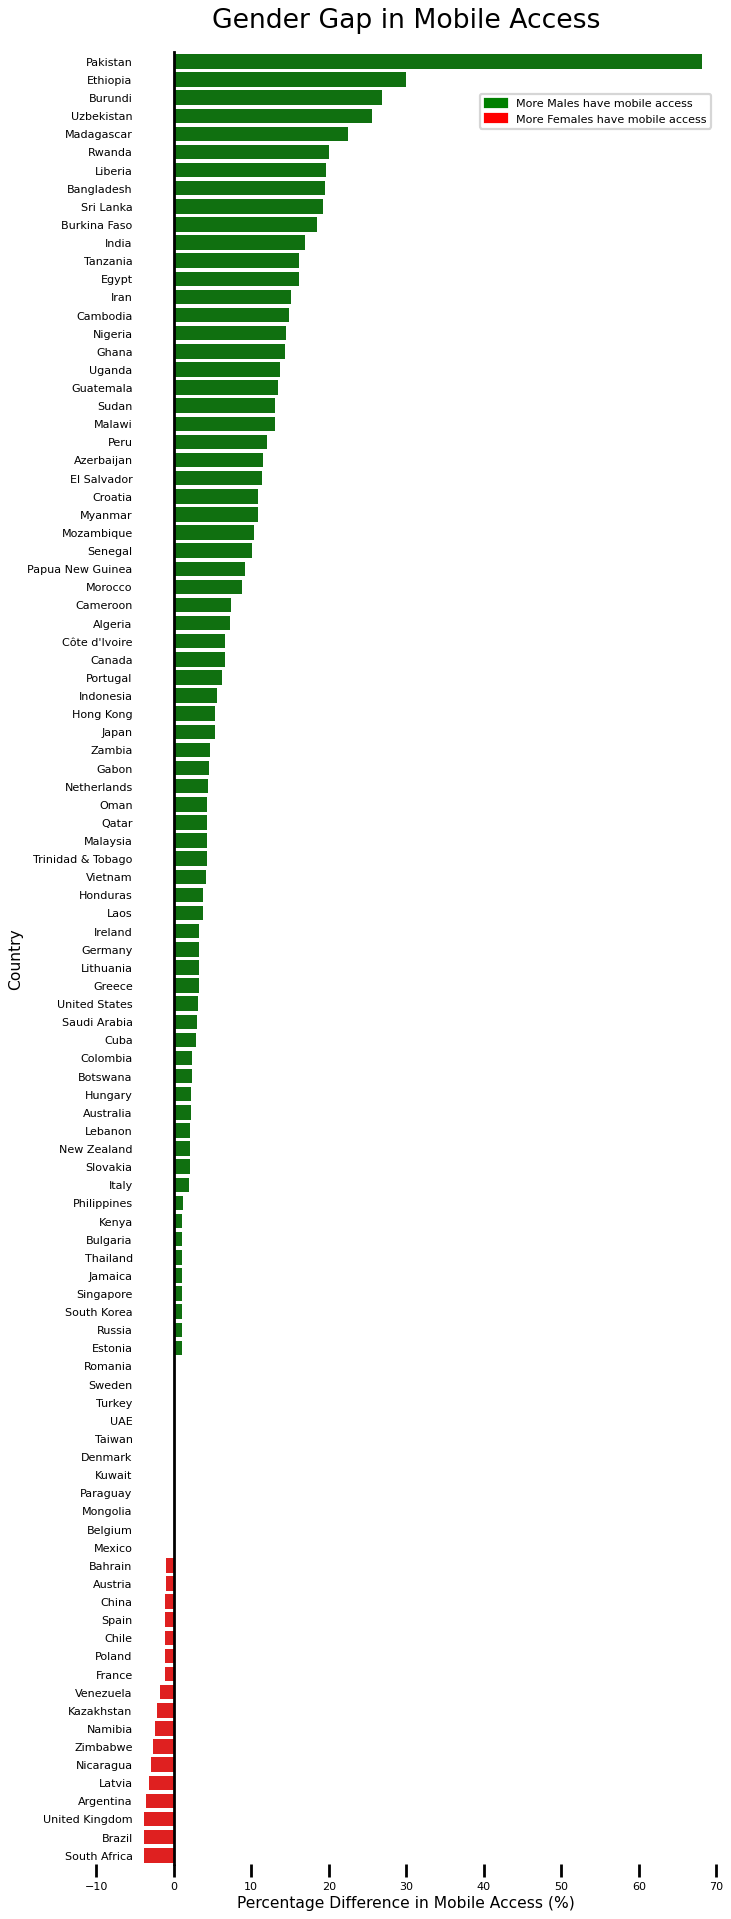

In [180]:
plt.figure(figsize=(10,30), dpi=80)
colors = np.where(ma['Gender gap in mobile phone access; % difference']<0, 'r', 'g')
sns.barplot(x = 'Gender gap in mobile phone access; % difference', y='Country',data=ma, palette=list(colors) )
ax = plt.subplot(111)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.title('Gender Gap in Mobile Access',y=1.01)
plt.xlabel('Percentage Difference in Mobile Access (%)', size=14)
plt.ylabel('Country',size=14)
green_patch = mpatches.Patch(color='green', label='More Males have mobile access')
red_patch = mpatches.Patch(color='red', label='More Females have mobile access')
plt.legend(bbox_to_anchor=(1,.98),handles=[green_patch,red_patch],prop={'size': 10})
ax.spines['left'].set_position(('data',0))
ax.tick_params(left= False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params('y',pad= 25)
plt.xlim((-10,70))
plt.savefig("Gender_Gap_Mobile.png")
plt.show()